In [ ]:
import numpy
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from   plotly.subplots import make_subplots
from   plotly import subplots

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.offsetbox import TextArea,DrawingArea,OffsetImage,AnnotationBbox
from matplotlib.collections import PatchCollection
from matplotlib.patches import PathPatch
from matplotlib.patches import Polygon
from matplotlib import image
import seaborn as sns

In [ ]:
data_df = pd.read_csv('vaccinations.csv')
data_df.head()

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,daily_vaccinations_per_million,daily_people_vaccinated,daily_people_vaccinated_per_hundred
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,34.0,1367.0,0.003
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,34.0,1367.0,0.003
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,34.0,1367.0,0.003
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,34.0,1367.0,0.003


Text(0.5, 0, 'Countries')

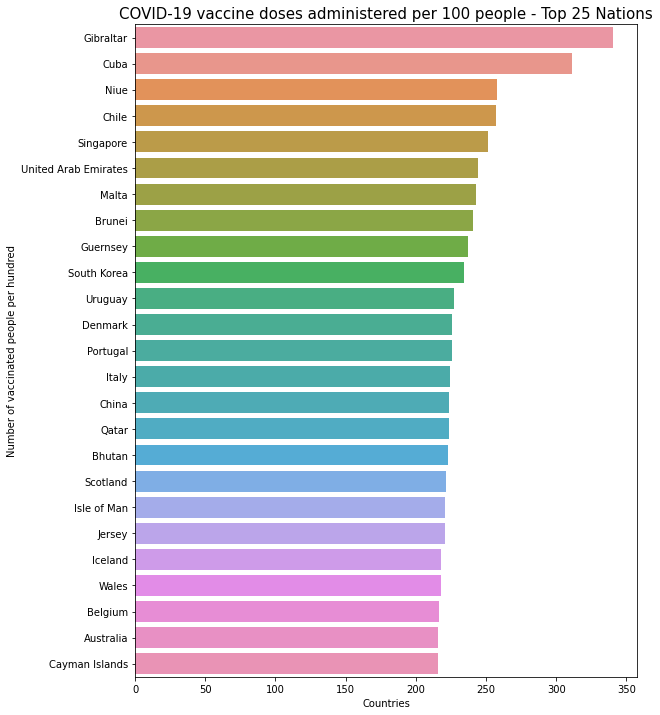

In [ ]:
cols = ['location', 'total_vaccinations', 'iso_code', 'daily_vaccinations','total_vaccinations_per_hundred']
vaccines_per_hundred = data_df[cols].groupby('location').max().sort_values('total_vaccinations', ascending=False).dropna(subset=['total_vaccinations'])
vaccines_per_hundred.reset_index(level=0, inplace=True)
vaccines_per_hundred = vaccines_per_hundred.sort_values('total_vaccinations_per_hundred', ascending=False)
vaccines_per_hundred = vaccines_per_hundred.iloc[0:25]
vaccines_per_hundred.reset_index(level=0, inplace=True)

plt.figure(figsize=(9, 12))
sns.barplot(y=vaccines_per_hundred['location'], x=vaccines_per_hundred['total_vaccinations_per_hundred'], orient='h')
plt.title('COVID-19 vaccine doses administered per 100 people - Top 25 Nations', fontdict = { 'fontsize': 15})
plt.ylabel('Number of vaccinated people per hundred')
plt.xlabel('Countries')

Text(0.5, 0, 'Countries')

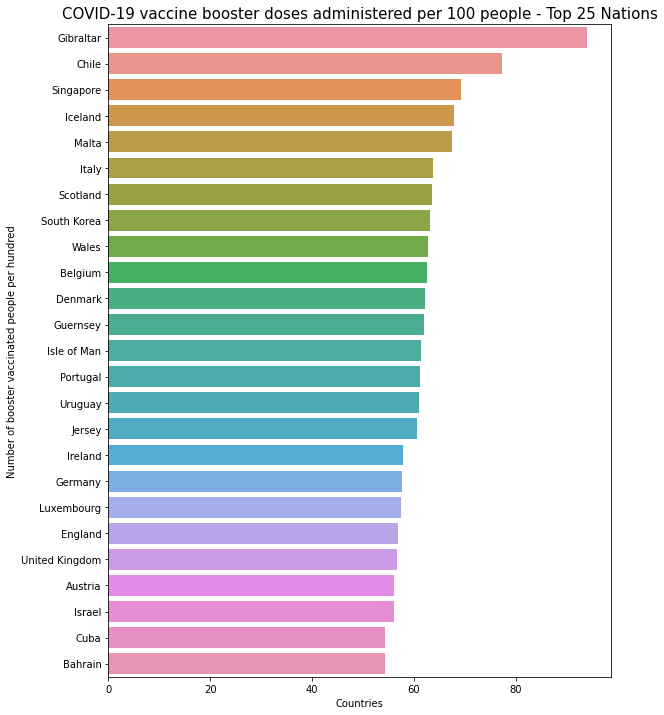

In [ ]:
cols = ['location', 'total_vaccinations', 'iso_code', 'daily_vaccinations','total_boosters_per_hundred']
vaccines_per_hundred = data_df[cols].groupby('location').max().sort_values('total_vaccinations', ascending=False).dropna(subset=['total_vaccinations'])
vaccines_per_hundred.reset_index(level=0, inplace=True)
vaccines_per_hundred = vaccines_per_hundred.sort_values('total_boosters_per_hundred', ascending=False)
vaccines_per_hundred = vaccines_per_hundred.iloc[0:25]
vaccines_per_hundred.reset_index(level=0, inplace=True)

plt.figure(figsize=(9, 12))
sns.barplot(y=vaccines_per_hundred['location'], x=vaccines_per_hundred['total_boosters_per_hundred'], orient='h')
plt.title('COVID-19 vaccine booster doses administered per 100 people - Top 25 Nations', fontdict = { 'fontsize': 15})
plt.ylabel('Number of booster vaccinated people per hundred')
plt.xlabel('Countries')

Text(0.5, 0, 'Countries')

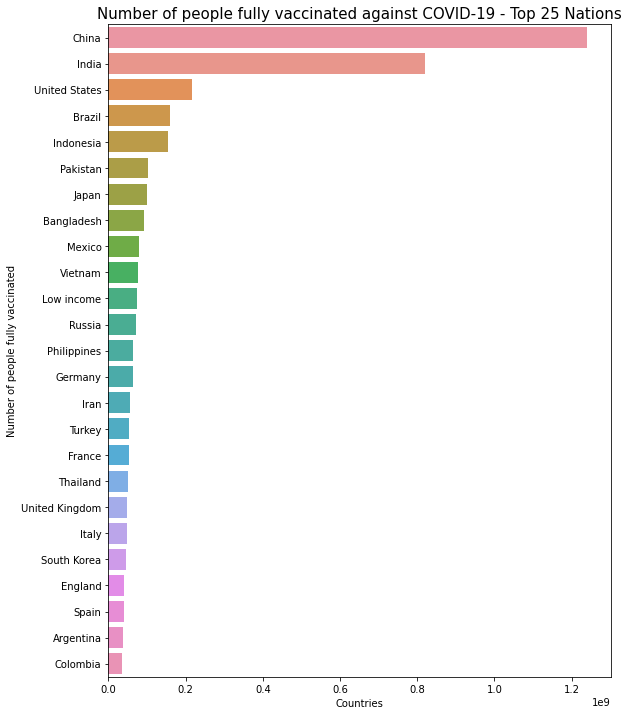

In [ ]:
cols = ['location', 'total_vaccinations', 'iso_code', 'daily_vaccinations', 'people_vaccinated','people_fully_vaccinated']
people_fully_vaccinated = data_df[cols].groupby('location').max().sort_values('total_vaccinations', ascending=False).dropna(subset=['total_vaccinations'])
people_fully_vaccinated.reset_index(level=0, inplace=True)
drop_rows = ['World', 'High income', 'North America', 'South America', 'Europe', 'European Union', 'Asia', 'Africa', 'Upper middle income', 'Lower middle income']

people_fully_vaccinated = people_fully_vaccinated[~people_fully_vaccinated['location'].isin(drop_rows)]


people_fully_vaccinated = people_fully_vaccinated.sort_values('people_fully_vaccinated', ascending=False)
people_fully_vaccinated = people_fully_vaccinated.iloc[0:25]
people_fully_vaccinated.reset_index(level=0, inplace=True)

plt.figure(figsize=(9, 12))
sns.barplot(y=people_fully_vaccinated['location'], x=people_fully_vaccinated['people_fully_vaccinated'], orient='h')

plt.title('Number of people fully vaccinated against COVID-19 - Top 25 Nations', fontdict = { 'fontsize': 15})
plt.ylabel('Number of people fully vaccinated')
plt.xlabel('Countries')

In [ ]:
population_df = pd.read_csv('2021_population.csv',thousands=',')
population_df = population_df.sort_values(by='country')
population_df.head()

,iso_code,country,2021_last_updated,2020_population,area,density_sq_km,growth_rate,world_%,rank
36,AFG,Afghanistan,39929284,38928346,"652,230 sq_km",61/sq_km,2.33%,0.51%,37
139,ALB,Albania,2872370,2877797,"28,748 sq_km",100/sq_km,-0.17%,0.04%,140
33,DZA,Algeria,44694125,43851044,"2,381,741 sq_km",19/sq_km,1.75%,0.57%,34
205,ASM,American Samoa,55100,55191,199 sq_km,277/sq_km,-0.16%,0.00%,209
198,AND,Andorra,77355,77265,468 sq_km,165/sq_km,0.12%,0.00%,202


In [ ]:
data_df['month_year'] =pd.to_datetime(data_df['date']).dt.to_period('m')
data_df['month_year'] = data_df['month_year'].astype(str)

In [ ]:
# usa_df = data_df.loc[data_df['iso_code']=='USA']
# usa_df.head()

In [ ]:
iran_df = data_df.loc[data_df['iso_code']=='IRN']
iran_df.head()

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,daily_vaccinations_per_million,daily_people_vaccinated,daily_people_vaccinated_per_hundred,month_year
37726,Iran,IRN,2021-02-08,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,2021-02
37727,Iran,IRN,2021-02-09,3000.0,3000.0,NaN,NaN,3000.0,3000.0,0.0,0.0,NaN,NaN,35.0,3000.0,0.004,2021-02
37728,Iran,IRN,2021-02-10,NaN,NaN,NaN,NaN,NaN,1938.0,NaN,NaN,NaN,NaN,23.0,1938.0,0.002,2021-02
37729,Iran,IRN,2021-02-11,NaN,NaN,NaN,NaN,NaN,1583.0,NaN,NaN,NaN,NaN,19.0,1583.0,0.002,2021-02
37730,Iran,IRN,2021-02-12,NaN,NaN,NaN,NaN,NaN,1406.0,NaN,NaN,NaN,NaN,17.0,1406.0,0.002,2021-02


In [ ]:
iran_population = population_df.loc[population_df['iso_code']=='IRN']['2021_last_updated']
iran_population = iran_population.iloc[0]

In [ ]:
# usa_population = population_df.loc[population_df['iso_code']=='USA']['2021_last_updated']
# usa_population = usa_population.iloc[0]

In [ ]:
symmetic_countries = population_df.loc[(population_df['2021_last_updated'] < (iran_population * 1.1)) & (population_df['2021_last_updated'] >(iran_population * 0.9))]
symmetic_countries

,iso_code,country,2021_last_updated,2020_population,area,density_sq_km,growth_rate,world_%,rank
15,COD,Dr Congo,92667027,89561403,"2,344,858 sq_km",39/sq_km,3.14%,1.17%,16
18,DEU,Germany,83913565,83783942,"357,114 sq_km",235/sq_km,0.14%,1.07%,19
17,IRN,Iran,85132894,83992949,"1,648,195 sq_km",52/sq_km,1.23%,1.08%,18
16,TUR,Turkey,85119676,84339067,"783,562 sq_km",109/sq_km,0.83%,1.08%,17


In [ ]:
# symmetic_countries = population_df.loc[(population_df['2021_last_updated'] < (usa_population * 1.5)) & (population_df['2021_last_updated'] >(usa_population * 0.5))]
# symmetic_countries

In [ ]:
neighbours = ["AFG","SUA","ARE","IRQ",'AZE',"TUR","QAT","PAK","ARM","TKM","IRN"]
neighbor_countries = population_df.loc[population_df['iso_code'].isin(neighbours)]
neighbor_countries
symmetric= ['COD','DEU',"IRN","TUR"]
same_population = population_df.loc[population_df["iso_code"].isin(symmetric)]

In [ ]:
# neighbours = ["CAN","MEX","CUB","COL",'BRA',"VEN","PER","BOL","CHL","PRY","USA"]
# neighbor_countries = population_df.loc[population_df['iso_code'].isin(neighbours)]
# neighbor_countries
# symmetric= ['BRA','IDN',"PAK","USA"]
# same_population = population_df.loc[population_df["iso_code"].isin(symmetric)]

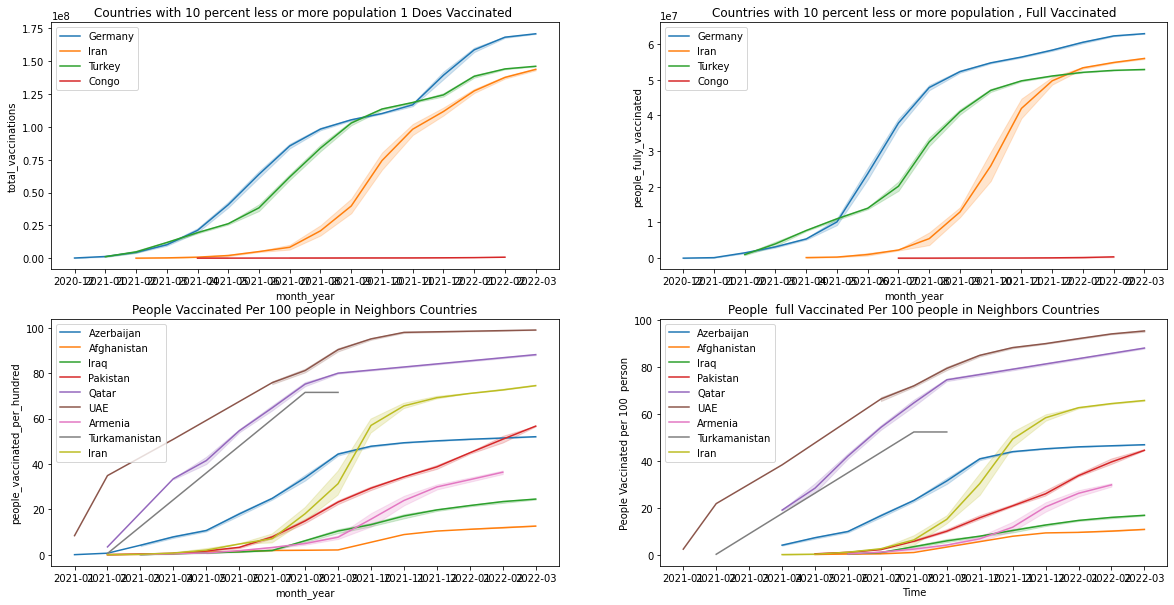

In [ ]:
german_df = data_df.loc[data_df['iso_code']=='DEU']
turkey_df = data_df.loc[data_df['iso_code']=='TUR']
congo_df  = data_df.loc[data_df['iso_code']=='COD']
azer_df = data_df.loc[data_df['iso_code']=='AZE']
afghan_df = data_df.loc[data_df['iso_code']=='AFG']
iraq_df = data_df.loc[data_df['iso_code']=='IRQ']
pakistan_df = data_df.loc[data_df['iso_code']=='PAK']
qatar_df = data_df.loc[data_df['iso_code']=='QAT']
saudi_df = data_df.loc[data_df['iso_code']=='SUA']
uae_df = data_df.loc[data_df['iso_code']=='ARE']
armenia_df = data_df.loc[data_df['iso_code']=="ARM"]
turkaman_df = data_df.loc[data_df['iso_code']=="TKM"]

fig,axes = plt.subplots(ncols=2 , nrows =2 ,figsize=(20,10))

sns.lineplot(y= german_df['total_vaccinations'],x=german_df['month_year'],label ="Germany",ax=axes[0,0])
sns.lineplot(y= iran_df['total_vaccinations'],x=iran_df['month_year'],label="Iran",ax=axes[0,0])
sns.lineplot(y= turkey_df['total_vaccinations'],x=turkey_df['month_year'],label ="Turkey",ax=axes[0,0])
sns.lineplot(y= congo_df['total_vaccinations'],x=congo_df['month_year'],label ="Congo",ax=axes[0,0])
axes[0,0].set_title("Countries with 10 percent less or more population 1 Does Vaccinated ")

sns.lineplot(y= german_df['people_fully_vaccinated'],x=german_df['month_year'],label ="Germany",ax=axes[0,1])
sns.lineplot(y= iran_df['people_fully_vaccinated'],x=iran_df['month_year'],label="Iran",ax=axes[0,1])
sns.lineplot(y= turkey_df['people_fully_vaccinated'],x=turkey_df['month_year'],label ="Turkey",ax=axes[0,1])
sns.lineplot(y= congo_df['people_fully_vaccinated'],x=congo_df['month_year'],label ="Congo",ax=axes[0,1])
axes[0,1].set_title("Countries with 10 percent less or more population , Full Vaccinated")

sns.lineplot(y= azer_df['people_vaccinated_per_hundred'],x=azer_df['month_year'],label ="Azerbaijan",ax=axes[1,0])
sns.lineplot(y= afghan_df['people_vaccinated_per_hundred'],x=afghan_df['month_year'],label ="Afghanistan",ax=axes[1,0])
sns.lineplot(y= iraq_df['people_vaccinated_per_hundred'],x=iraq_df['month_year'],label ="Iraq",ax=axes[1,0])
sns.lineplot(y= pakistan_df['people_vaccinated_per_hundred'],x=pakistan_df['month_year'],label ="Pakistan",ax=axes[1,0])
sns.lineplot(y= qatar_df['people_vaccinated_per_hundred'],x=qatar_df['month_year'],label ="Qatar",ax=axes[1,0])
sns.lineplot(y= saudi_df['people_vaccinated_per_hundred'],x=saudi_df['month_year'],label ="Saudi Arabia",ax=axes[1,0])
sns.lineplot(y= uae_df['people_vaccinated_per_hundred'],x=uae_df['month_year'],label ="UAE",ax=axes[1,0])
sns.lineplot(y= armenia_df['people_vaccinated_per_hundred'],x=armenia_df['month_year'],label ="Armenia",ax=axes[1,0])
sns.lineplot(y= turkaman_df['people_vaccinated_per_hundred'],x=turkaman_df['month_year'],label ="Turkamanistan",ax=axes[1,0])
sns.lineplot(y= iran_df['people_vaccinated_per_hundred'],x=iran_df['month_year'],label="Iran",ax=axes[1,0])
axes[1,0].set_title("People Vaccinated Per 100 people in Neighbors Countries")
plt.xlabel("Time")
plt.ylabel("People Vaccinated per 100  person")

sns.lineplot(y= azer_df['people_fully_vaccinated_per_hundred'],x=azer_df['month_year'],label ="Azerbaijan",ax=axes[1,1])
sns.lineplot(y= afghan_df['people_fully_vaccinated_per_hundred'],x=afghan_df['month_year'],label ="Afghanistan",ax=axes[1,1])
sns.lineplot(y= iraq_df['people_fully_vaccinated_per_hundred'],x=iraq_df['month_year'],label ="Iraq",ax=axes[1,1])
sns.lineplot(y= pakistan_df['people_fully_vaccinated_per_hundred'],x=pakistan_df['month_year'],label ="Pakistan",ax=axes[1,1])
sns.lineplot(y= qatar_df['people_fully_vaccinated_per_hundred'],x=qatar_df['month_year'],label ="Qatar",ax=axes[1,1])
sns.lineplot(y= saudi_df['people_fully_vaccinated_per_hundred'],x=saudi_df['month_year'],label ="Saudi Arabia",ax=axes[1,1])
sns.lineplot(y= uae_df['people_fully_vaccinated_per_hundred'],x=uae_df['month_year'],label ="UAE",ax=axes[1,1])
sns.lineplot(y= armenia_df['people_fully_vaccinated_per_hundred'],x=armenia_df['month_year'],label ="Armenia",ax=axes[1,1])
sns.lineplot(y= turkaman_df['people_fully_vaccinated_per_hundred'],x=turkaman_df['month_year'],label ="Turkamanistan",ax=axes[1,1])
sns.lineplot(y= iran_df['people_fully_vaccinated_per_hundred'],x=iran_df['month_year'],label="Iran",ax=axes[1,1])
axes[1,1].set_title("People  full Vaccinated Per 100 people in Neighbors Countries")
plt.xlabel("Time")
plt.ylabel("People Vaccinated per 100  person")

plt.savefig("subplots1.jpg",bbox_inches='tight',dpi=300,facecolor='w')

In [ ]:
accumulatives = ['iso_code','total_vaccinations','people_vaccinated','people_fully_vaccinated','total_vaccinations_per_hundred','people_vaccinated_per_hundred','month_year']
acc_df =data_df[accumulatives]
country_breif = ["iso_code","country","2021_last_updated"]
country_final = population_df[country_breif]
acc_df = pd.merge(country_final,acc_df,on="iso_code")
acc_df.rename(columns={'2021_last_updated':'Population'},inplace=True)

In [ ]:
last_data = acc_df.groupby('iso_code').max().sort_values("total_vaccinations",ascending=False).dropna(subset=['total_vaccinations'])
last_data.head()

,country,Population,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_vaccinations_per_hundred,people_vaccinated_per_hundred,month_year
iso_code,,,,,,,,
CHN,China,1444712023,3.226334e+09,1.272537e+09,1.239171e+09,223.40,88.11,2022-03
IND,India,1394784323,1.811385e+09,9.714281e+08,8.194913e+08,130.00,69.72,2022-03
USA,United States,333114077,5.585448e+08,2.549847e+08,2.170602e+08,168.23,76.80,2022-03
BRA,Brazil,214139548,4.074358e+08,1.803601e+08,1.588635e+08,190.40,84.28,2022-03
IDN,Indonesia,276653405,2.747492e+08,1.945596e+08,1.542673e+08,99.42,70.40,2022-03


In [ ]:
most_doses_vaccinated = last_data.sort_values(by='people_vaccinated',ascending=False).iloc[0:15]
most_fully_vaccinated = last_data.sort_values(by='people_fully_vaccinated',ascending=False).iloc[0:15]
total_vaccination_per_hundred = last_data.sort_values(by='total_vaccinations_per_hundred',ascending=False).iloc[:15]
total_vaccination_per_hundred =  total_vaccination_per_hundred.set_index('country')
people_vaccinated_per_hundred = last_data.sort_values(by="people_vaccinated_per_hundred",ascending=False).iloc[:15]
people_vaccinated_per_hundred= people_vaccinated_per_hundred.set_index('country')

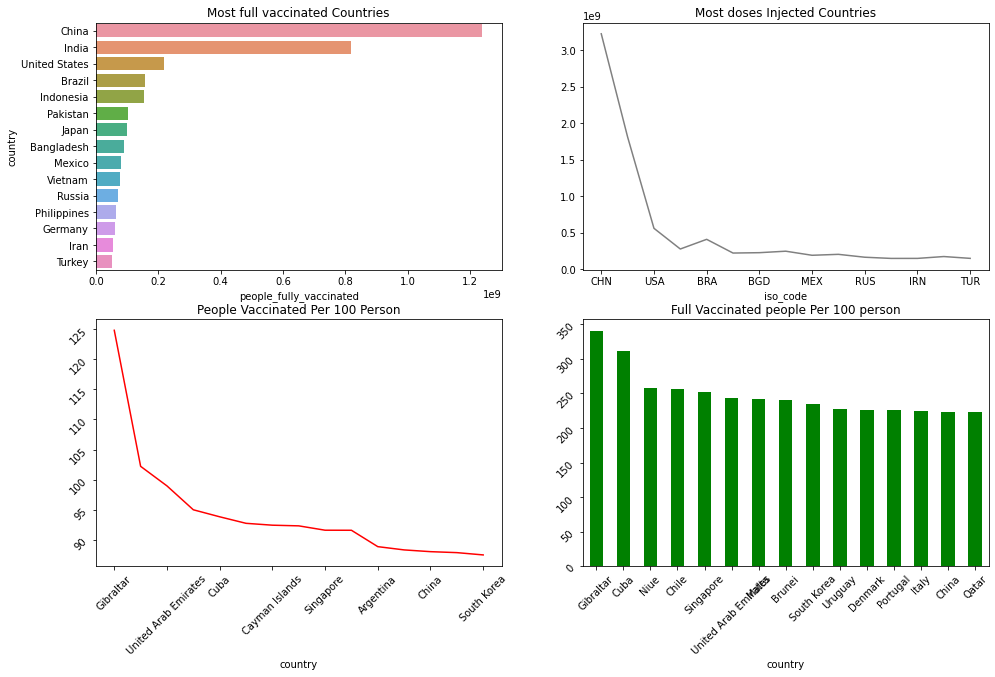

In [ ]:
fig ,axes = plt.subplots(ncols=2,nrows=2,figsize=(16,10))
# most_fully_vaccinated['people_fully_vaccinated'].plot(ax = axes[0,0],kind='bar')
sns.barplot(data=most_fully_vaccinated,x="people_fully_vaccinated",y="country",ax=axes[0,0])
axes[0,0].set_title("Most full vaccinated Countries")
most_doses_vaccinated['total_vaccinations'].plot(ax=axes[0,1],color="grey")
axes[0,1].set_title("Most doses Injected Countries")
total_vaccination_per_hundred['total_vaccinations_per_hundred'].plot(ax=axes[1,1],kind="bar",color="green")
axes[1,1].set_title("Full Vaccinated people Per 100 person")
axes[1,1].tick_params(labelrotation=45)
people_vaccinated_per_hundred['people_vaccinated_per_hundred'].plot(ax=axes[1,0],color ='red')
axes[1,0].tick_params(labelrotation=45)
axes[1,0].set_title("People Vaccinated Per 100 Person")
plt.savefig("subplots2.jpeg",facecolor='w',dpi=300)

In [ ]:
last_data['vaccinated_percent'] = last_data.people_vaccinated / last_data.Population * 100
last_data['full_vaccinated_percent'] = last_data.people_fully_vaccinated /last_data.Population * 100
neighbor_countries = last_data.loc[last_data.index.isin(neighbours)]
same_population = last_data.loc[last_data.index.isin(symmetric)]

In [ ]:
neighbor_countries =neighbor_countries.sort_values(by="vaccinated_percent",ascending=False)
same_population = same_population.sort_values(by="vaccinated_percent",ascending=False)
last_data = last_data.sort_values(by="vaccinated_percent",ascending=False)
last_data_temp = last_data[:15]
same_population.reset_index(inplace=True)
neighbor_countries.reset_index(inplace=True)
last_data.reset_index(inplace=True)
last_data_temp.reset_index(inplace=True)

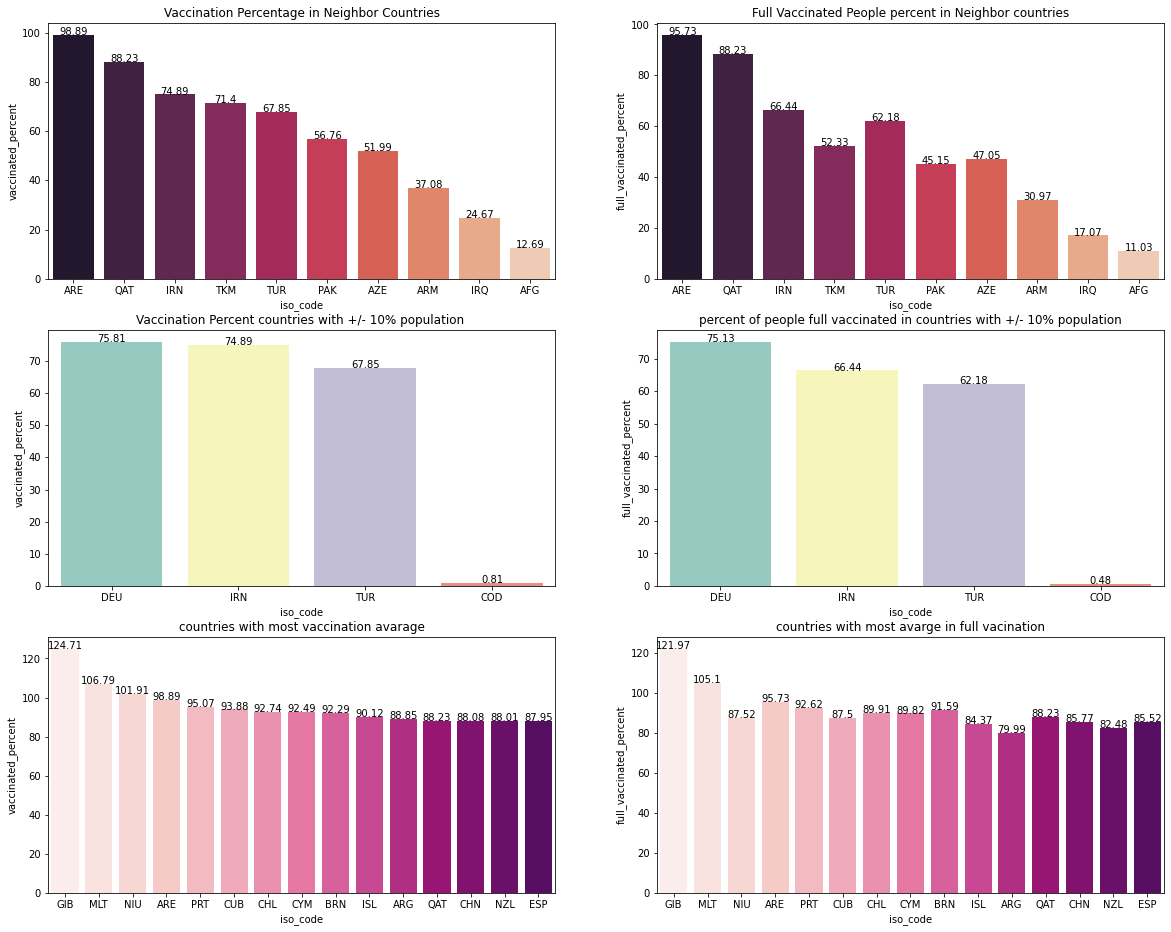

In [ ]:
fig,axes =plt.subplots(nrows=3 ,ncols=2,figsize=(20,16))
bar1 = sns.barplot(data=neighbor_countries,x="iso_code",y='vaccinated_percent',ax=axes[0,0],palette="rocket")
bar1.set_title("Vaccination Percentage in Neighbor Countries")
for index,row  in neighbor_countries.iterrows():
    bar1.text(row.name,row.vaccinated_percent,round(row.vaccinated_percent,2),color='black', ha="center")
    
bar2 = sns.barplot(data=neighbor_countries,x='iso_code',y='full_vaccinated_percent',ax=axes[0,1],palette="rocket")
bar2.set_title("Full Vaccinated People percent in Neighbor countries")
for index,row  in neighbor_countries.iterrows():
    bar2.text(row.name,row.full_vaccinated_percent,round(row.full_vaccinated_percent,2),color='black', ha="center")

bar3 = sns.barplot(data=same_population,x="iso_code",y='vaccinated_percent',ax=axes[1,0],palette="Set3")
bar3.set_title('Vaccination Percent countries with +/- 10% population ')
for index,row  in same_population.iterrows():
    bar3.text(row.name,row.vaccinated_percent,round(row.vaccinated_percent,2),color='black', ha="center")
    
    
bar4 = sns.barplot(data=same_population,x="iso_code",y='full_vaccinated_percent',ax=axes[1,1],palette="Set3")
bar4.set_title("percent of people full vaccinated in countries with +/- 10% population")
for index,row  in same_population.iterrows():
    bar4.text(row.name,row.full_vaccinated_percent,round(row.full_vaccinated_percent,2),color='black', ha="center")

bar5 =sns.barplot(data=last_data_temp,x="iso_code",y="vaccinated_percent",ax=axes[2,0],palette='RdPu')

bar5.set_title("countries with most vaccination avarage")
for index,row  in last_data_temp.iterrows():
    bar5.text(row.name,row.vaccinated_percent,round(row.vaccinated_percent,2),color='black', ha="center")


bar6 =sns.barplot(data=last_data_temp,x="iso_code",y="full_vaccinated_percent",ax=axes[2,1],palette='RdPu')
bar6.set_title("countries with most avarge in full vacination")
for index,row  in last_data_temp.iterrows():
    bar6.text(row.name,row.full_vaccinated_percent,round(row.full_vaccinated_percent,2),color='black', ha="center")


plt.savefig("subplots3.jpeg",dpi=300,facecolor='w')

In [ ]:
fig=px.choropleth(last_data,locations="iso_code",color="vaccinated_percent",
                  hover_name="country",color_continuous_scale="balance",
                  projection="natural earth",range_color=[100,0],
                  title ='<span style="font-size:36px; font-family:Times New Roman">Percentage of People  Vaccinated</span>',)
fig.show()
fig.write_html("index.html")